In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import itertools
import time
import statsmodels.api as sm

In [2]:
data = pd.read_csv('data/Hitters.csv').dropna()
data

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [3]:
hitters = pd.get_dummies(data, columns=['League', 'Division', 'NewLeague'], drop_first=True)
hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0,1,0,1
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0,0,0,0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0,0,1,0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0,0,0,0


In [4]:
X = hitters.drop(columns=['Salary'])
y = hitters['Salary']

In [5]:
# Perform Best subset selection
def process_subset(feature_set):
    # Fit model on feature_set and calculate R2
    model = sm.OLS(y,sm.add_constant(X[list(feature_set)]))
    regr = model.fit()
    R2 = regr.rsquared

    # Return dict include model and useful information 
    return {"model":regr, "R2":R2}

In [6]:
def get_best_subset(k):
    
    # Want to create list of models with k predictors 
    results = []
    
    # Start counting time
    tic = time.time()
    
    # Process combinations features to create model & retult
    for feature_set in itertools.combinations(X.columns, k):
        results.append(process_subset(feature_set))
    
    # Wrap result up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest R2
    best_model = models.loc[models['R2'].argmax()]
    
    toc = time.time()
    print("Processed {:5} models on {:2} predictors in {:6.2f} seconds.".format(models.shape[0], k, (toc-tic)))
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [7]:
models_best = pd.DataFrame(columns=["model", "R2"])

tic = time.time()
for i in range(1,20):
    models_best.loc[i] = get_best_subset(i)

toc = time.time()
print("Total elapsed time: {:.2f} seconds.".format((toc-tic)))

Processed    19 models on  1 predictors in   0.08 seconds.
Processed   171 models on  2 predictors in   0.44 seconds.
Processed   969 models on  3 predictors in   2.19 seconds.
Processed  3876 models on  4 predictors in   9.37 seconds.
Processed 11628 models on  5 predictors in  28.51 seconds.
Processed 27132 models on  6 predictors in  78.02 seconds.
Processed 50388 models on  7 predictors in 175.31 seconds.
Processed 75582 models on  8 predictors in 259.99 seconds.
Processed 92378 models on  9 predictors in 296.02 seconds.
Processed 92378 models on 10 predictors in 284.22 seconds.
Processed 75582 models on 11 predictors in 456.51 seconds.
Processed 50388 models on 12 predictors in 181.63 seconds.
Processed 27132 models on 13 predictors in 102.06 seconds.
Processed 11628 models on 14 predictors in  49.25 seconds.
Processed  3876 models on 15 predictors in  16.27 seconds.
Processed   969 models on 16 predictors in   4.40 seconds.
Processed   171 models on 17 predictors in   0.85 second

In [8]:
# Perform Forward Stepwise Selection
def forward_stepwise(predictors):
    
    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]

    tic = time.time()

    results = []

    for p in remaining_predictors:
        results.append(process_subset(predictors + [p]))

    # Wrap result up in a nice dataframe
    models = pd.DataFrame(results)

    # Choose model with the highest R2
    best_model = models.loc[models['R2'].argmax()]

    toc = time.time()

    print('Processed {:3} models on {:2} predictors in {:6.2f} seconds.'.format(models.shape[0], len(predictors)+1, (toc-tic)))
    return best_model

In [9]:
models_fwd = pd.DataFrame(columns=['model','R2'])

tic = time.time()
predictors = []

for i in range(1, len(X.columns)+1):
    models_fwd.loc[i] = forward_stepwise(predictors)
    predictors = list(models_fwd.loc[i,'model'].model.exog_names)
    predictors.remove('const')

toc = time.time()
print('Total elapsed time: {:.2f} seconds.'.format(toc-tic))

Processed  19 models on  1 predictors in   0.11 seconds.
Processed  18 models on  2 predictors in   0.06 seconds.
Processed  17 models on  3 predictors in   0.05 seconds.
Processed  16 models on  4 predictors in   0.06 seconds.
Processed  15 models on  5 predictors in   0.06 seconds.
Processed  14 models on  6 predictors in   0.06 seconds.
Processed  13 models on  7 predictors in   0.05 seconds.
Processed  12 models on  8 predictors in   0.05 seconds.
Processed  11 models on  9 predictors in   0.05 seconds.
Processed  10 models on 10 predictors in   0.05 seconds.
Processed   9 models on 11 predictors in   0.04 seconds.
Processed   8 models on 12 predictors in   0.04 seconds.
Processed   7 models on 13 predictors in   0.04 seconds.
Processed   6 models on 14 predictors in   0.03 seconds.
Processed   5 models on 15 predictors in   0.03 seconds.
Processed   4 models on 16 predictors in   0.02 seconds.
Processed   3 models on 17 predictors in   0.02 seconds.
Processed   2 models on 18 pred

In [10]:
# Perform Backward Stepwise selection
def backward_stepwise(predictors, i):
    
    tic = time.time()

    results = []

    for p in itertools.combinations(predictors, i):
        results.append(process_subset(p))

    models = pd.DataFrame(results)

    best_model = models.loc[models['R2'].argmax()]

    toc = time.time()

    print('Processed {:3} models on {:2} predictors in {:5.2f} seconds.'.format(models.shape[0], i, (toc-tic)))
    
    return best_model

In [11]:
models_bwd = pd.DataFrame(columns=['model','R2'])

tic = time.time()
predictors = X.columns

for i in range(len(X.columns), 0, -1):
    models_bwd.loc[i] = backward_stepwise(predictors, i)
    predictors = list(models_bwd.loc[i]['model'].model.exog_names)
    predictors.remove('const')

toc = time.time()
print('Total elapsed time: {:.2f} seconds.'.format(toc-tic))

Processed   1 models on 19 predictors in  0.01 seconds.
Processed  19 models on 18 predictors in  0.11 seconds.
Processed  18 models on 17 predictors in  0.09 seconds.
Processed  17 models on 16 predictors in  0.08 seconds.
Processed  16 models on 15 predictors in  0.07 seconds.
Processed  15 models on 14 predictors in  0.06 seconds.
Processed  14 models on 13 predictors in  0.06 seconds.
Processed  13 models on 12 predictors in  0.06 seconds.
Processed  12 models on 11 predictors in  0.05 seconds.
Processed  11 models on 10 predictors in  0.04 seconds.
Processed  10 models on  9 predictors in  0.03 seconds.
Processed   9 models on  8 predictors in  0.03 seconds.
Processed   8 models on  7 predictors in  0.03 seconds.
Processed   7 models on  6 predictors in  0.03 seconds.
Processed   6 models on  5 predictors in  0.02 seconds.
Processed   5 models on  4 predictors in  0.02 seconds.
Processed   4 models on  3 predictors in  0.01 seconds.
Processed   3 models on  2 predictors in  0.01 s

In [12]:
# Function add metrics R2_adj, AIC, BIC
def add_metrics_table(models):
    models['R2_adj'] = models.apply(lambda x: x['model'].rsquared_adj, axis=1)
    models['AIC'] = models.apply(lambda x: x['model'].aic, axis=1)
    models['BIC'] = models.apply(lambda x: x['model'].bic, axis=1)

In [13]:
add_metrics_table(models_fwd)
add_metrics_table(models_bwd)
add_metrics_table(models_best)

In [14]:
# Function display 4 charts on single model
def display_chart_models(models):
    plt.figure(figsize=(12,12))

    plt.subplot(2,2,1)
    sb.lineplot(x=models.index, y=models['R2'])
    max_R2 = models['R2'].max()
    plt.plot(models[models['R2']==max_R2].index, max_R2, 'ro')
    plt.xticks(models.index)

    plt.subplot(2,2,2)
    sb.lineplot(x=models.index, y=models['R2_adj'])
    max_R2_adj = models['R2_adj'].max()
    plt.plot(models[models['R2_adj']==max_R2_adj].index, max_R2_adj, 'ro')
    plt.xticks(models.index)

    plt.subplot(2,2,3)
    sb.lineplot(x=models.index, y=models['AIC'])
    min_AIC = models['AIC'].min()
    plt.plot(models[models['AIC']==min_AIC].index, min_AIC, 'ro')
    plt.xticks(models.index)

    plt.subplot(2,2,4)
    sb.lineplot(x=models.index, y=models['BIC'])
    min_BIC = models['BIC'].min()
    plt.plot(models[models['BIC']==min_BIC].index, min_BIC, 'ro')
    plt.xticks(models.index)

    plt.show()

In [15]:
# Function display charts on multiple model
def display_chart_multiple_models(list_models):
    plt.figure(figsize=(12,12))

    # Plot R2
    plt.subplot(2,2,1)
    for (models, labels) in list_models:
        sb.lineplot(x=models.index, y=models['R2'], label=labels)
        max_R2 = models['R2'].max()
        plt.scatter(models[models['R2']==max_R2].index, max_R2)
        plt.xticks(models.index)
    plt.legend()

    # Plot R2_adj
    plt.subplot(2,2,2)
    for (models, labels) in list_models:
        sb.lineplot(x=models.index, y=models['R2_adj'], label=labels)
        max_R2_adj = models['R2_adj'].max()
        plt.scatter(models[models['R2_adj']==max_R2_adj].index, max_R2_adj)
        plt.xticks(models.index)
    plt.legend()

    # Plot AIC
    plt.subplot(2,2,3)
    for (models, labels) in list_models:
        sb.lineplot(x=models.index, y=models['AIC'], label=labels)
        min_AIC = models['AIC'].min()
        plt.scatter(models[models['AIC']==min_AIC].index, min_AIC)
        plt.xticks(models.index)
    plt.legend()

    # Plot BIC
    plt.subplot(2,2,4)
    for (models, labels) in list_models:
        sb.lineplot(x=models.index, y=models['BIC'], label=labels)
        min_BIC = models['BIC'].min()
        plt.scatter(models[models['BIC']==min_BIC].index, min_BIC)
        plt.xticks(models.index)
    plt.legend()

    plt.show()

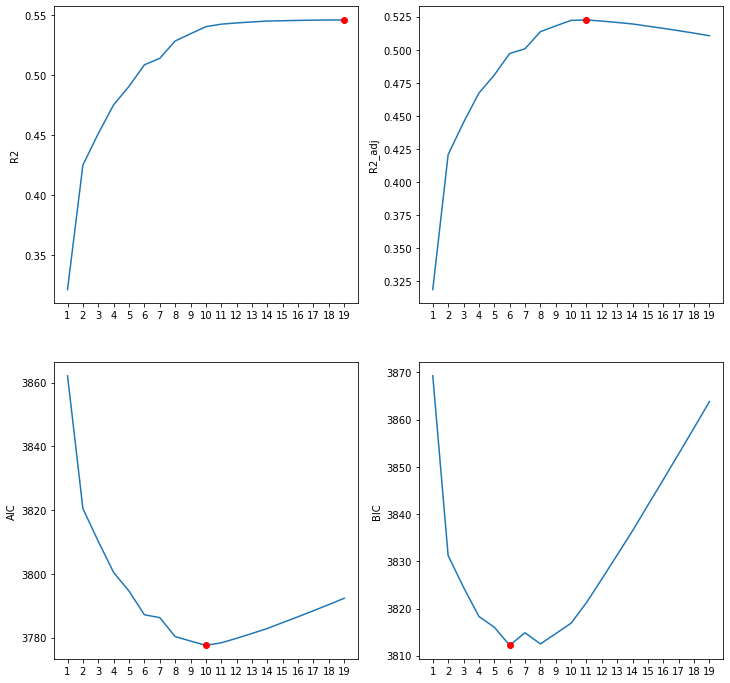

In [16]:
display_chart_models(models_best)

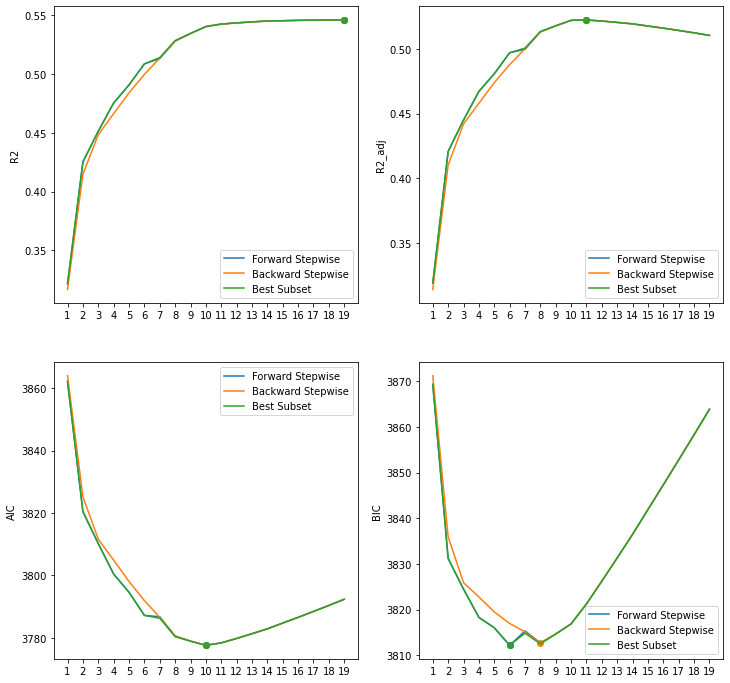

In [17]:
display_chart_multiple_models([[models_fwd,'Forward Stepwise'], [models_bwd, 'Backward Stepwise'], [models_best, 'Best Subset']])